In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [25]:
df=pd.read_csv(r'C:\data set\Demo Datasets\Lesson 7\driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.shape

(4000, 3)

In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
df = df.drop(['id'],axis=1)

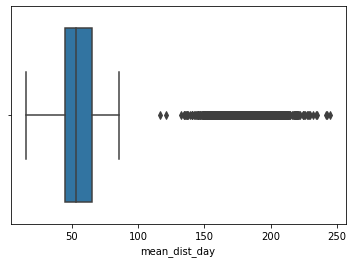

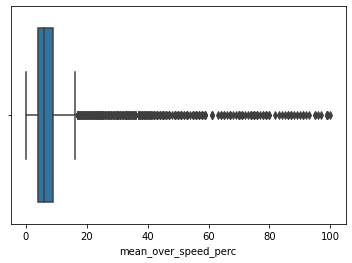

In [7]:
for i in df:
    sns.boxplot(df[i])
    plt.show()

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(df)


KMeans(n_clusters=2)

In [9]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [10]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
df['cluster'] = km.labels_

In [20]:
df.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


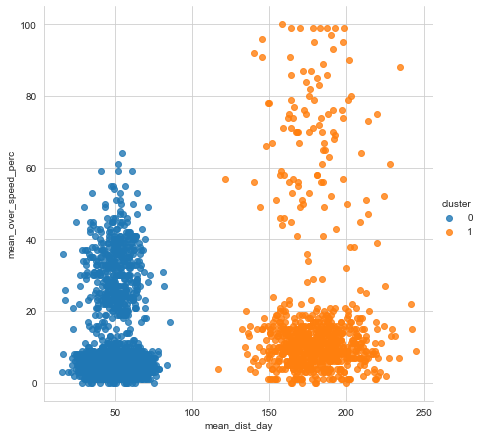

In [21]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df,hue='cluster',fit_reg=False,size=6)

### To plot the elbow method to find the cluster

In [22]:
wcss = []   # within cluster sum of squares
for i in range (1,6):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)

Text(0.5, 0, 'number of cluster')

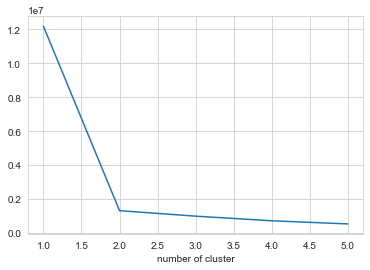

In [23]:
plt.plot(range(1,6),wcss)
plt.xlabel('number of cluster')

In [24]:
model.inertia_

534871.1466878138

In [ ]:
pip! install